In [1]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import findspark
findspark.init()
import pyspark
from pyspark import SparkConf, SparkContext

conf = SparkConf().setMaster("local").setAppName("Pdf File")
sc = SparkContext(conf = conf)

In [2]:
# In[2]:

import pickle
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage

In [3]:
# In[3]:


import time
import re
import math
import glob

In [4]:
# In[4]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

In [5]:
# In[5]:

global t
t=time.clock()
#path = 'D:/PDFFile2'
#path = 'D:/PDFfileall'
path = 'D:/temp'
global pathlen
pathlen=len(path)
files = [f for f in glob.glob(path + "**/*.pdf")]
print(pathlen)

7


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [6]:
print(files)

['D:/temp\\COVID_1.pdf']


In [7]:
# In[6]:


global names
names=[]
global co
co=0

In [8]:
# In[7]:


def convert_pdf_to_txt(path):
    global co
    print(co)
    co=co+1
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)
        

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    print(text)
    text = re.findall('[a-zA-Z][a-zA-Z]+',text)
    print(text)
    return text

In [9]:
def load_twitter():
    pickle_in=open("twitter.pickle","rb")
    t=pickle.load(pickle_in)
    return t
twitter=load_twitter()

In [10]:
print(twitter[0])

[1252966550837112833, "It's time for the people to take back their countries and the world. End the evil empire and its overlords!\n\n#VaccineAgenda #SocialDistancing https://t.co/9P1XQJGXYB"]


In [11]:
# In[8]:


def read_files_from(file_list):
    termsDoc=[]
    for i in file_list:
        x=convert_pdf_to_txt(i)
        termsDoc.append([a.lower() for a in x])   
    return termsDoc 

def spark(files):
    n_parts = 2
    rdd1 = sc.parallelize(files, n_parts ) #distribute files among nodes
    ts=time.clock()
    list_of_pdf_strings = rdd1.mapPartitions(read_files_from).collect()
    ts=time.clock()-ts
    print(ts)
    names = []
    for i in files:
        names.append(i[pathlen+1:])
    return list_of_pdf_strings, names

In [12]:
# In[9]:


"""type(list_of_pdf_strings)
for i in files:    
    names.append(i[pathlen+1:])"""

'type(list_of_pdf_strings)\nfor i in files:    \n    names.append(i[pathlen+1:])'

In [13]:
# In[10]:

def FilterDoc(twitter):
    termsDoc=[]
    names=[]
    ts=time.clock()
    for i in twitter[0:500]:
        #x=convert_pdf_to_txt(i)
        x = re.findall('[a-zA-Z]{2}[a-zA-z]*',i[1])
        termsDoc.append([a.lower() for a in x])
        string=str(i[0])+ str("==")+str(i[1])
        names.append(string)
    ts=time.clock()-ts
    print(ts)
    return termsDoc, names


In [14]:
"""def name(files):
    n= []
    for i in files:
        n.append(i[pathlen+1:])
    return n
names = name(files)
print(names)"""

'def name(files):\n    n= []\n    for i in files:\n        n.append(i[pathlen+1:])\n    return n\nnames = name(files)\nprint(names)'

In [15]:
# In[11]:


global sw
sw=["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
tdoc=[]
termsDoc=[]
completeList=[]

In [16]:
# In[12]:

global names
termsDoc,names=FilterDoc(twitter)
#print("\n\nThe Pdfs available are:\n")
s=0
for i in names:
    #print(s+1,") ",i)
    s=s+1
print(s)

0.015104799999999585
500


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


In [17]:
# In[13]:
def RemStopWords(termsDoc):
    global sw
    termsDoc1=termsDoc
    for i in range(len(names)):
        termsDoc[i]=[a for a in termsDoc[i] if a not in sw and len(a)>3]
    return termsDoc,termsDoc1

In [18]:
termsDoc

[['it',
  'time',
  'for',
  'the',
  'people',
  'to',
  'take',
  'back',
  'their',
  'countries',
  'and',
  'the',
  'world',
  'end',
  'the',
  'evil',
  'empire',
  'and',
  'its',
  'overlords',
  'vaccineagenda',
  'socialdistancing',
  'https',
  'co',
  'xqjgxyb'],
 ['thanks', 'for', 'the', 'service', 'again', 'policemv'],
 ['need',
  'haircut',
  'in',
  'the',
  'worst',
  'way',
  'and',
  'my',
  'salon',
  'is',
  'opening',
  'on',
  'so',
  'guess',
  'what',
  'still',
  'going',
  'to',
  'need',
  'haircut',
  'on',
  'stayhome'],
 ['it',
  'three',
  'ring',
  'circus',
  'of',
  'ineptitude',
  'the',
  'apocalypse',
  'criers',
  'claiming',
  'covid',
  'was',
  'the',
  'ultimate',
  'viral',
  'pandemic',
  'the',
  'curve',
  'crowd',
  'grifters',
  'modeling',
  'that',
  'all',
  'hospitals',
  'turn',
  'into',
  'mash',
  'units',
  'the',
  'lockdown',
  'gang',
  'agoraphobics',
  'churning',
  'their',
  'neuroticism',
  'in',
  'virtue',
  'signali

In [19]:
# In[14]:


termsDoc,termsDoc1=RemStopWords(termsDoc)
def CreatingList(termsDoc):
    global sw
    global completeList
    trial=[]
    #trial=ai+wm+dm
    #print(len(trial),len(ai))
    trial = [a for a in termsDoc]
    for i in trial:
        for j in i:
            if j not in sw:
                completeList.append(j)
    completeList=list(set(completeList))
CreatingList(termsDoc)

In [20]:
# In[15]:


def BooleanMatrix(termsDoc1):
    global completeList
    lenOfDocs=[]
    for i in termsDoc1:
        lenOfDocs.append(len(i))
    l=-1
    bools=[]
    for k in termsDoc:
        temp=[]
        l=l+1
        for i in completeList:
            if(i in k):
                x=k.count(i)
                temp.append(x/lenOfDocs[l])
            else:
                temp.append(0)
        bools.append(temp)
    mat=[completeList]
    for i in bools:
        mat.append(i)
    return mat

In [21]:
# In[16]:


mat=BooleanMatrix(termsDoc1)
def idfVector(mat):
    global completeList
    idf=[]
    for i in range(len(completeList)):
        c=0
        for j in range(len(names)):
            #print(mat[j+1][i])
            if(mat[j+1][i]>0):
                c=c+1
        if(c!=0):
            idfx=math.log((1+3)/c)
        else:
            idfx=0
        idf.append(idfx)
    return idf

In [22]:
# In[17]:


print(mat)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
# In[18]:


words=mat[0]
mat=mat[1:]
M=pd.DataFrame(mat,columns=words)
#print(M)
X = M.iloc[:,:].values
#print(X)


# kmeans = KMeans(n_clusters =4,init = 'k-means++',max_iter=100000,n_init=10)
# y_kmeans = kmeans.fit_predict(X)

# print(y_kmeans)

# pd.DataFrame(names,y_kmeans)
# for i in names:
#     print(i)

In [24]:
# In[19]:


X=pd.DataFrame(mat)

In [25]:
# In[20]:


print(len(X.columns))

4060


In [26]:
# In[22]:
def save_training_data(X):
    pickle_out=open("x.pickle","wb")
    pickle.dump(X,pickle_out)
    pickle_out.close()
save_training_data(X)

In [27]:
# In[23]:
"""
def load_data():
    pickle_in=open("x.pickle","rb")
    X=pickle.load(pickle_in)
    return X
X=load_data()"""

'\ndef load_data():\n    pickle_in=open("x.pickle","rb")\n    X=pickle.load(pickle_in)\n    return X\nX=load_data()'

In [39]:
# In[24]:


global k
k=[]
#arr="2,3,4,5,6,7,8,9,10,11,12,13,14,15,16".split(',')
a=2
arr=[]
for i in range(2,50):
    arr.append(i)
#arr="1,2,3,4,5,6,7,8,9,10,11".split(',')

In [40]:
# In[25]:


print(arr)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [41]:
# In[26]:

from sklearn.cluster import SpectralClustering
def load_data():
    pickle_in=open("x.pickle","rb")
    X=pickle.load(pickle_in)
    return X
X=load_data()
def multiple_kmeans(arr):
    termsDoc=[]
    global distortions
    distortions=[]
    for i in arr:
        global k
        print(i)
        #x=convert_pdf_to_txt(i)
        #termsDoc.append([a.lower() for a in x])  
        #kmeans = KMeans(n_clusters =int(i),init = 'k-means++',max_iter=10000,n_init=10)
        kmeans = SpectralClustering(n_clusters =int(i),n_init=10,assign_labels='discretize')
        kmeans.fit(X)
        y_kmeans = kmeans.fit_predict(X)
        #k.append(y_kmeans)
        #distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
        #distortions.append(kmeans.inertia_)
        label = kmeans.labels_
        #distortions.append(silhouette_score(X, label, metric='euclidean'))
        #distortions.append(silhouette_score(X, label, metric='manhattan'))
        #distortions.append(silhouette_score(X, label, metric='cosine'))
        distortions.append(silhouette_score(X, label, metric='sokalsneath'))
    return distortions

#n_parts = 4
#rdd = sc.parallelize(arr, n_parts ) #distribute files among nodes
ts=time.clock()
#Y = rdd.mapPartitions(multiple_kmeans).collect()
Y=multiple_kmeans(arr)
ts=time.clock()-ts
print(ts)

2


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


3


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


4


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


5


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


6


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


7


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


8


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


9


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


10


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


11


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


12


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


13


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


14


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


15


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


16


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


17


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


18


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


19


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


20


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


21


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


22


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


23


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


24


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


25


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


26


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


27


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


28


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


29


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


30


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


31


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


32


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


33


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


34


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


35


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


36


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


37


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


38


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


39


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


40


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


41


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


42


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


43


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


44


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


45


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


46


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


47


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


48


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


49


C:\Users\shrey\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1575: DataConversionWarning: Data was converted to boolean for metric sokalsneath
  warnings.warn(msg, DataConversionWarning)


66.98186259999999


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [42]:
print(Y)

[0.019442042351398812, 0.009207648058056205, 0.01121524775424584, 0.013849797650300538, 0.017021306967179746, 0.021035399500830863, 0.027028272099292452, 0.024858317270597695, 0.025560921704017303, 0.025577498530569877, 0.0370356368762291, 0.03759974634417034, 0.03969334180225286, 0.040639815092338896, 0.03985462480491332, 0.04105446156407048, 0.04337855787438365, 0.04374360774467759, 0.04119526661214971, 0.045389609147237324, 0.04474148591040892, 0.04578455530446483, 0.04466087971233628, 0.04542172139069921, 0.04936932497205812, 0.04791334416000753, 0.051089791523193, 0.05104378910673136, 0.05512295962343526, 0.055113265789279824, 0.05234416928339515, 0.05377087306492512, 0.06380043825617353, 0.06907680199659291, 0.060051104784787285, 0.06368181691885771, 0.06241158031868769, 0.062240708035332375, 0.06394187879663385, 0.06115300294708363, 0.060467132612113415, 0.0639586160825588, 0.06561655378586785, 0.06291695224926261, 0.06412284335000437, 0.06397388218853142, 0.06642328859993231, 0

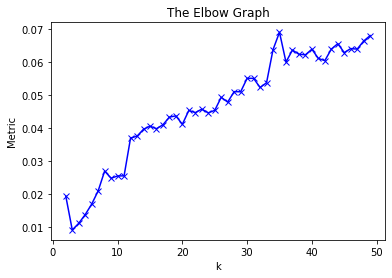

115.7658034


C:\Users\shrey\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  import sys


In [43]:
# In[28]:
plt.plot(arr, Y, 'bx-')
plt.xlabel('k')
plt.ylabel('Metric')
plt.title('The Elbow Graph')
plt.show()
t=time.clock()-t
print(t)

In [46]:
max(Y)

0.06907680199659291

In [52]:
# In[ ]:


K=int(input("Enter the value of K: "))
#kmeans = KMeans(n_clusters =K,init = 'k-means++',max_iter=100000,n_init=10)
kmeans = SpectralClustering(n_clusters =K,n_init=10,assign_labels='discretize')

y_kmeans = kmeans.fit_predict(X)

Enter the value of K: 9


In [53]:
# In[ ]:


print(y_kmeans)

[1 0 0 0 0 6 8 0 6 6 0 0 0 1 8 7 6 6 6 1 8 8 6 3 1 8 6 6 8 8 8 0 8 8 0 7 6
 6 6 6 6 1 6 6 6 7 0 0 7 6 0 6 8 0 6 0 8 1 8 0 8 7 2 7 0 1 8 6 3 0 8 1 7 0
 6 1 8 1 0 7 8 0 8 6 6 0 7 0 6 2 2 7 0 0 0 6 6 8 6 7 0 1 0 0 0 7 0 1 8 7 6
 0 6 2 8 0 6 1 0 6 8 7 0 0 8 2 0 8 6 6 6 0 0 6 7 1 6 0 0 8 6 8 8 0 6 8 1 8
 0 0 6 6 0 6 6 8 8 7 0 6 0 0 0 0 0 0 6 1 7 0 5 6 6 7 1 8 0 1 6 1 1 2 8 6 0
 6 6 6 6 0 1 6 7 7 0 6 0 6 0 0 0 6 0 0 0 7 0 8 8 8 8 0 6 6 0 8 6 8 6 6 0 0
 0 7 0 6 6 0 6 0 6 6 6 5 0 6 0 0 0 6 6 1 6 7 6 6 0 0 0 6 0 6 6 6 6 6 6 0 6
 5 0 0 0 5 0 0 6 6 8 8 2 6 2 6 6 8 0 0 6 6 6 0 6 1 6 0 8 7 6 1 8 4 0 6 0 6
 8 7 8 7 6 8 0 6 0 0 7 8 6 6 7 8 6 0 6 0 0 0 6 6 8 0 0 8 6 0 5 8 1 8 8 8 0
 8 6 6 6 0 8 6 8 6 6 6 6 1 6 0 6 8 6 5 1 2 6 6 6 6 0 6 6 8 8 0 0 0 8 5 0 8
 0 8 7 1 6 8 0 6 1 7 6 0 8 2 7 0 2 7 6 0 8 6 0 8 0 8 1 6 6 6 2 6 0 0 8 0 8
 6 0 7 0 6 8 0 8 8 0 6 8 4 0 6 2 1 1 0 1 6 6 0 0 5 1 6 6 0 6 8 8 6 7 6 0 0
 8 6 8 0 6 6 7 6 1 7 0 6 6 0 6 0 8 5 6 6 5 8 1 6 7 8 8 0 6 7 6 6 6 8 0 8 6
 8 1 6 1 6 6 1 7 7 8 8 6 

In [54]:
# In[ ]:


Result=pd.DataFrame(names,y_kmeans)
print(twitter[0][1])

It's time for the people to take back their countries and the world. End the evil empire and its overlords!

#VaccineAgenda #SocialDistancing https://t.co/9P1XQJGXYB


In [57]:
# In[ ]:
pd.options.display.max_rows = 4000
r=Result.sort_index()
r=r[0]
print(r)

0    1252966623398563842==How about you research th...
0    1252966615366369280==WOW\n\nInstead  of Obsess...
0    1252966577059717120==The models used in this p...
0    1252966592192958464==Still looking for yesterd...
0    1252966624522616835==Like A Good Little \nHill...
0    1252966615919890435==As part of our #WorldEnvi...
0    1252966566259458048==We need to look after @Mi...
0    1252966565634588672==#TheGreatAwakening is hap...
0    1252966566515351552==The urgency has never bee...
0    1252966567421317121==This is wild, though I'm ...
0    1252966592033349633==Help the planet from home...
0    1252966567739965446==Conservatives: Free marke...
0    1252966576367611906==The Cabal at work, the li...
0    1252966624203694080==Keep the good work going ...
0    1252966576221020160==Watch this @realDonaldTru...
0    1252966566838370307==Since the start of the #c...
0    1252966591911747585==Our next step: Leak bank ...
0    1252966565609431041==:COLLISION SYMBOL:Chris C...
0    12529

In [59]:
r=pd.DataFrame(r)
for i in r[0][150:200]:
    print(i)

1252966550837112833==It's time for the people to take back their countries and the world. End the evil empire and its overlords!

#VaccineAgenda #SocialDistancing https://t.co/9P1XQJGXYB
1252966558919356417==#CoronaUpdates - 10 people have been discharged from SVIMS State #COVID19 hospital in Tirupati. 7 people belong to Chittoor and 3 belong to Kadapa district. #APFightsCorona
@collectorctr @CollectorKadapa https://t.co/l5g1IWOuEN
1252966563751305216==:POLICE CARS REVOLVING LIGHT: NHS England has announced 665 new deaths of people who tested positive for #COVID19 , bringing the total number of confirmed reported deaths in hospitals in England to 16,272

All the latest :WHITE DOWN POINTING BACKHAND INDEX:

https://t.co/YyuQIF6Q1l
1252966627781607424==The anti-lockdown sentiment is beginning to spread like #COVID19 itself. 

On Monday, 300 people gathered in front of a Karl Marx monument in #Chemnitz, #Germany, to show the authorities how angry they are about the stay-at-home measures h

In [38]:
# X.info()

# from pyspark.sql import SQLContext
# spark = SQLContext(sc)

# data=spark.createDataFrame(X)

# data_rdd=data.rdd

# data_rdd.cache()

# data

# clusters = KMeans.train(data_rdd, 4, maxIterations=100, initializationMode="random")

# 

# In[ ]: